In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('readonly/samsung_20180504_20210503_D.csv')
df

,date,time,open,high,low,close,volume
0,20180504,0,53000,53900,51800,51900,39565391
1,20180508,0,52600,53200,51900,52600,23104720
2,20180509,0,52600,52800,50900,50900,16128305
3,20180510,0,51700,51700,50600,51600,13905263
4,20180511,0,52000,52200,51200,51300,10314997
...,...,...,...,...,...,...,...
732,20210427,0,83200,83300,82500,82900,12941533
733,20210428,0,83200,83200,82100,82100,15596759
734,20210429,0,82400,82500,81500,81700,20000973
735,20210430,0,81900,82100,81500,81500,18673197


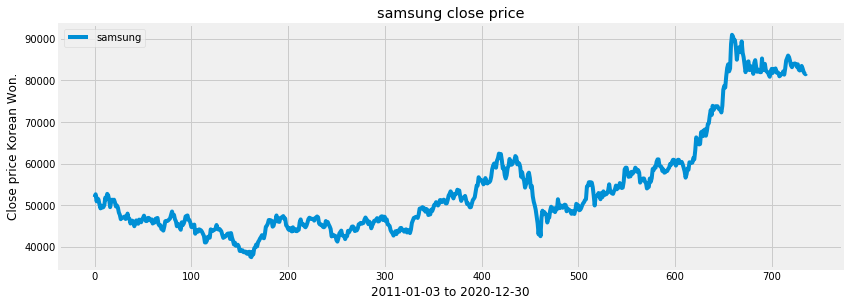

In [4]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(df['close'], label = 'samsung')
plt.title('samsung close price')
plt.xlabel('2011-01-03 to 2020-12-30')
plt.ylabel('Close price Korean Won.')
plt.legend(loc='upper left')
plt.show()

In [5]:
# moving average of 30 days
ma30 = pd.DataFrame()
ma30['close'] = df['close'].rolling(30).mean()
ma30

,close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
732,83113.333333
733,83106.666667
734,83066.666667
735,83053.333333


In [6]:
ma100 = pd.DataFrame()
ma100['close'] = df['close'].rolling(100).mean()
ma100

,close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
732,81728.0
733,81871.0
734,81993.0
735,82111.0


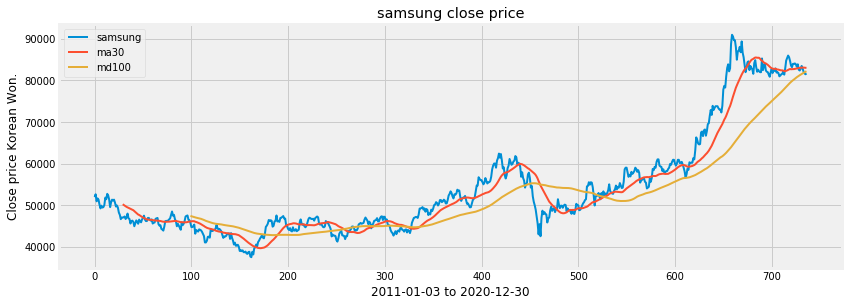

In [7]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(df['close'], label = 'samsung', linewidth=2)
plt.plot(ma30, label = 'ma30', linewidth=2)
plt.plot(ma100, label = 'md100', linewidth=2)
plt.title('samsung close price')
plt.xlabel('2011-01-03 to 2020-12-30')
plt.ylabel('Close price Korean Won.')
plt.legend(loc='upper left')
plt.show()

Simple strategy: signal when short-term and long-term average crosses

 - buy-in signal: when short-term average become __higher__ than long-term average

 - sell-out signal: when short-term average become __lower__ than long-term average

In [8]:
data = pd.concat([df['close'], ma30['close'], ma100['close']], axis=1)
data.columns = ['close', 'SMA30', 'SMA100']
data

,close,SMA30,SMA100
0,51900,NaN,NaN
1,52600,NaN,NaN
2,50900,NaN,NaN
3,51600,NaN,NaN
4,51300,NaN,NaN
...,...,...,...
732,82900,83113.333333,81728.0
733,82100,83106.666667,81871.0
734,81700,83066.666667,81993.0
735,81500,83053.333333,82111.0


In [9]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['close'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['close'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

In [15]:
data['close']

0      51900
1      52600
2      50900
3      51600
4      51300
       ...  
732    82900
733    82100
734    81700
735    81500
736    81700
Name: close, Length: 737, dtype: int64

In [11]:
data['Buy_Signal_Price'], data['Sell_Signal_Price']  = buy_sell(data)
data

,close,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,51900,NaN,NaN,NaN,NaN
1,52600,NaN,NaN,NaN,NaN
2,50900,NaN,NaN,NaN,NaN
3,51600,NaN,NaN,NaN,NaN
4,51300,NaN,NaN,NaN,NaN
...,...,...,...,...,...
732,82900,83113.333333,81728.0,NaN,NaN
733,82100,83106.666667,81871.0,NaN,NaN
734,81700,83066.666667,81993.0,NaN,NaN
735,81500,83053.333333,82111.0,NaN,NaN


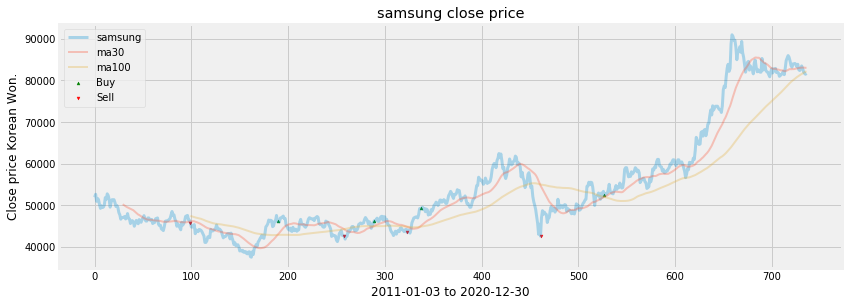

In [12]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(data['close'], label = 'samsung', linewidth=3, alpha=0.3)
plt.plot(data['SMA30'], label = 'ma30', linewidth=2, alpha=0.3)
plt.plot(data['SMA100'], label = 'ma100', linewidth=2, alpha=0.3)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker='^', color='green', s=8)
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker='v', color='red', s=8)
plt.title('samsung close price')
plt.xlabel('2011-01-03 to 2020-12-30')
plt.ylabel('Close price Korean Won.')
plt.legend(loc='upper left')
plt.show()